# Assignment # 1
### Name: Sameer Khan


# Importing Necessary Libraries 



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
from textblob import TextBlob

# Making DataFrame from a .txt File 


In [2]:
file_path = 'whatsapp chat.txt'

# Create empty lists to store extracted data
dates_times = []
users = []
messages = []

# Read the text file and extract data
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        parts = line.split(' - ', 1)  # Split the line into two parts at the first ' - '
        if len(parts) == 2:
            date_time, rest = parts
            date, time = date_time.split(', ')
            user, message = rest.split(': ', 1)
            dates_times.append(date + ' ' + time)  # Combine date and time
            users.append(user)
            messages.append(message.strip())

df = pd.DataFrame({'Date_Time': dates_times, 'User': users, 'Message': messages})
# Coverting to 24hrs format
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%m/%d/%y %H:%M')

df.head()


,Date_Time,User,Message
0,2022-12-25 09:00:00,Sameer,Hey there! 😊 Are you ready for our trip this w...
1,2022-12-25 09:05:00,Friend,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴"
2,2022-12-25 09:06:00,Sameer,That's the spirit! 🚗 We're going to have a bla...
3,2022-12-25 09:10:00,Friend,I've been looking forward to it. 🏞️ Do you hav...
4,2022-12-25 09:12:00,Sameer,"Yes, I do! 📋 I've planned some exciting activi..."


# Making Pairs of messages 

In [3]:
 # Create a new DataFrame df2
df2 = pd.DataFrame()

# Extract data for df2
df2['Date_Time1'] = df['Date_Time'].shift(1)  
df2['Date_Time2'] = df['Date_Time']  
df2['User1'] = df['User'].shift(1) 
df2['User2'] = df['User'] 
df2['Message1'] = df['Message'].shift(1)
df2['Message2'] = df['Message']


# Drop the first row of df2 since it contains NaN values due to shifting
df2 = df2.dropna()
df2.head()


,Date_Time1,Date_Time2,User1,User2,Message1,Message2
1,2022-12-25 09:00:00,2022-12-25 09:05:00,Sameer,Friend,Hey there! 😊 Are you ready for our trip this w...,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴"
2,2022-12-25 09:05:00,2022-12-25 09:06:00,Friend,Sameer,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",That's the spirit! 🚗 We're going to have a bla...
3,2022-12-25 09:06:00,2022-12-25 09:10:00,Sameer,Friend,That's the spirit! 🚗 We're going to have a bla...,I've been looking forward to it. 🏞️ Do you hav...
4,2022-12-25 09:10:00,2022-12-25 09:12:00,Friend,Sameer,I've been looking forward to it. 🏞️ Do you hav...,"Yes, I do! 📋 I've planned some exciting activi..."
5,2022-12-25 09:12:00,2022-12-25 09:13:00,Sameer,Friend,"Yes, I do! 📋 I've planned some exciting activi...",Great! Can you share it with me?


# Extracting the date,hour,minute of both the Messages
Extracted Only the date , hour and Minutes of both the message for better understanding of Data

In [4]:
df2['only_date of 1'] = df2['Date_Time1'].dt.date
df2['hour of 1'] = df2['Date_Time1'].dt.hour
df2['minute of 1'] = df2['Date_Time1'].dt.minute
df2['only_date of 2 '] = df2['Date_Time2'].dt.date
df2['hour of 2'] = df2['Date_Time2'].dt.hour
df2['minute of 2'] = df2['Date_Time2'].dt.minute

In [5]:
df2.head()

,Date_Time1,Date_Time2,User1,User2,Message1,Message2,only_date of 1,hour of 1,minute of 1,only_date of 2,hour of 2,minute of 2
1,2022-12-25 09:00:00,2022-12-25 09:05:00,Sameer,Friend,Hey there! 😊 Are you ready for our trip this w...,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",2022-12-25,9,0,2022-12-25,9,5
2,2022-12-25 09:05:00,2022-12-25 09:06:00,Friend,Sameer,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",That's the spirit! 🚗 We're going to have a bla...,2022-12-25,9,5,2022-12-25,9,6
3,2022-12-25 09:06:00,2022-12-25 09:10:00,Sameer,Friend,That's the spirit! 🚗 We're going to have a bla...,I've been looking forward to it. 🏞️ Do you hav...,2022-12-25,9,6,2022-12-25,9,10
4,2022-12-25 09:10:00,2022-12-25 09:12:00,Friend,Sameer,I've been looking forward to it. 🏞️ Do you hav...,"Yes, I do! 📋 I've planned some exciting activi...",2022-12-25,9,10,2022-12-25,9,12
5,2022-12-25 09:12:00,2022-12-25 09:13:00,Sameer,Friend,"Yes, I do! 📋 I've planned some exciting activi...",Great! Can you share it with me?,2022-12-25,9,12,2022-12-25,9,13


# Feature Extraction 
## 1st Feature 
### Tap Gap/Difference between Two Messages

In [6]:
# Calculate the time gap between Date_Time1 and Date_Time2 in seconds
df2['Time_Gap'] = (df2['Date_Time2'] - df2['Date_Time1']).dt.total_seconds()

# print(df2)
df2.head()

,Date_Time1,Date_Time2,User1,User2,Message1,Message2,only_date of 1,hour of 1,minute of 1,only_date of 2,hour of 2,minute of 2,Time_Gap
1,2022-12-25 09:00:00,2022-12-25 09:05:00,Sameer,Friend,Hey there! 😊 Are you ready for our trip this w...,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",2022-12-25,9,0,2022-12-25,9,5,300.0
2,2022-12-25 09:05:00,2022-12-25 09:06:00,Friend,Sameer,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",That's the spirit! 🚗 We're going to have a bla...,2022-12-25,9,5,2022-12-25,9,6,60.0
3,2022-12-25 09:06:00,2022-12-25 09:10:00,Sameer,Friend,That's the spirit! 🚗 We're going to have a bla...,I've been looking forward to it. 🏞️ Do you hav...,2022-12-25,9,6,2022-12-25,9,10,240.0
4,2022-12-25 09:10:00,2022-12-25 09:12:00,Friend,Sameer,I've been looking forward to it. 🏞️ Do you hav...,"Yes, I do! 📋 I've planned some exciting activi...",2022-12-25,9,10,2022-12-25,9,12,120.0
5,2022-12-25 09:12:00,2022-12-25 09:13:00,Sameer,Friend,"Yes, I do! 📋 I've planned some exciting activi...",Great! Can you share it with me?,2022-12-25,9,12,2022-12-25,9,13,60.0


## Feature 2
### Sentiment Analysis
Performed Sentiment analysis and found the sentiment Polarity of each message 
Sentiment Polarity give a value in range on -1(Negative) to 1(Positive)

In [7]:

def get_sentiment_polarity(message):
    analysis = TextBlob(message)
    return analysis.sentiment.polarity

df2['Sentiment_Polarity1'] = df2['Message1'].apply(get_sentiment_polarity)
df2['Sentiment_Polarity2'] = df2['Message2'].apply(get_sentiment_polarity)

# print(df2)
df2.head()


,Date_Time1,Date_Time2,User1,User2,Message1,Message2,only_date of 1,hour of 1,minute of 1,only_date of 2,hour of 2,minute of 2,Time_Gap,Sentiment_Polarity1,Sentiment_Polarity2
1,2022-12-25 09:00:00,2022-12-25 09:05:00,Sameer,Friend,Hey there! 😊 Are you ready for our trip this w...,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",2022-12-25,9,0,2022-12-25,9,5,300.0,0.20,0.25
2,2022-12-25 09:05:00,2022-12-25 09:06:00,Friend,Sameer,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",That's the spirit! 🚗 We're going to have a bla...,2022-12-25,9,5,2022-12-25,9,6,60.0,0.25,0.00
3,2022-12-25 09:06:00,2022-12-25 09:10:00,Sameer,Friend,That's the spirit! 🚗 We're going to have a bla...,I've been looking forward to it. 🏞️ Do you hav...,2022-12-25,9,6,2022-12-25,9,10,240.0,0.00,0.00
4,2022-12-25 09:10:00,2022-12-25 09:12:00,Friend,Sameer,I've been looking forward to it. 🏞️ Do you hav...,"Yes, I do! 📋 I've planned some exciting activi...",2022-12-25,9,10,2022-12-25,9,12,120.0,0.00,0.30
5,2022-12-25 09:12:00,2022-12-25 09:13:00,Sameer,Friend,"Yes, I do! 📋 I've planned some exciting activi...",Great! Can you share it with me?,2022-12-25,9,12,2022-12-25,9,13,60.0,0.30,1.00


## Feature 3
### Checking if the 1st message in each pair is a Question
Checked whether a question mark existed anywhere in 1st message. Assuming that if the '?' existed then it is a question

In [8]:
def has_question_mark(message):
    for char in message:
        if char == '?':
            return 1
    return 0

df2['Question?'] = df2['Message1'].apply(has_question_mark)
df2.head()

,Date_Time1,Date_Time2,User1,User2,Message1,Message2,only_date of 1,hour of 1,minute of 1,only_date of 2,hour of 2,minute of 2,Time_Gap,Sentiment_Polarity1,Sentiment_Polarity2,Question?
1,2022-12-25 09:00:00,2022-12-25 09:05:00,Sameer,Friend,Hey there! 😊 Are you ready for our trip this w...,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",2022-12-25,9,0,2022-12-25,9,5,300.0,0.20,0.25,1
2,2022-12-25 09:05:00,2022-12-25 09:06:00,Friend,Sameer,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",That's the spirit! 🚗 We're going to have a bla...,2022-12-25,9,5,2022-12-25,9,6,60.0,0.25,0.00,0
3,2022-12-25 09:06:00,2022-12-25 09:10:00,Sameer,Friend,That's the spirit! 🚗 We're going to have a bla...,I've been looking forward to it. 🏞️ Do you hav...,2022-12-25,9,6,2022-12-25,9,10,240.0,0.00,0.00,0
4,2022-12-25 09:10:00,2022-12-25 09:12:00,Friend,Sameer,I've been looking forward to it. 🏞️ Do you hav...,"Yes, I do! 📋 I've planned some exciting activi...",2022-12-25,9,10,2022-12-25,9,12,120.0,0.00,0.30,1
5,2022-12-25 09:12:00,2022-12-25 09:13:00,Sameer,Friend,"Yes, I do! 📋 I've planned some exciting activi...",Great! Can you share it with me?,2022-12-25,9,12,2022-12-25,9,13,60.0,0.30,1.00,0


# Feature 4
### Response Keywords Matching
Performed keyword matching on the the second message checking whether the second message has any of the response word. If the response word existed then assumed that the message is response 
Also checked for how many respnose words are there in the message and sum the value at the end and put in dataframe

In [9]:
response_keywords = ['yes', 'no', 'agree', 'disagree','absolutely'] 

def keyword_matching(message):
    return sum(1 for keyword in response_keywords if keyword in message.lower())

df2['Response_Keywords'] = df2['Message2'].apply(keyword_matching)
df2.head()


,Date_Time1,Date_Time2,User1,User2,Message1,Message2,only_date of 1,hour of 1,minute of 1,only_date of 2,hour of 2,minute of 2,Time_Gap,Sentiment_Polarity1,Sentiment_Polarity2,Question?,Response_Keywords
1,2022-12-25 09:00:00,2022-12-25 09:05:00,Sameer,Friend,Hey there! 😊 Are you ready for our trip this w...,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",2022-12-25,9,0,2022-12-25,9,5,300.0,0.20,0.25,1,1
2,2022-12-25 09:05:00,2022-12-25 09:06:00,Friend,Sameer,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",That's the spirit! 🚗 We're going to have a bla...,2022-12-25,9,5,2022-12-25,9,6,60.0,0.25,0.00,0,0
3,2022-12-25 09:06:00,2022-12-25 09:10:00,Sameer,Friend,That's the spirit! 🚗 We're going to have a bla...,I've been looking forward to it. 🏞️ Do you hav...,2022-12-25,9,6,2022-12-25,9,10,240.0,0.00,0.00,0,0
4,2022-12-25 09:10:00,2022-12-25 09:12:00,Friend,Sameer,I've been looking forward to it. 🏞️ Do you hav...,"Yes, I do! 📋 I've planned some exciting activi...",2022-12-25,9,10,2022-12-25,9,12,120.0,0.00,0.30,1,1
5,2022-12-25 09:12:00,2022-12-25 09:13:00,Sameer,Friend,"Yes, I do! 📋 I've planned some exciting activi...",Great! Can you share it with me?,2022-12-25,9,12,2022-12-25,9,13,60.0,0.30,1.00,0,0


# Feature 5
### Jaccard Similarity
Performed jaccard similarity to check how many common key words exist in both messages. For this first the words are tokenized and then in both the tokenized messages intersection is taken to find out how many common words are present. And then the similarity is returned
Jaccarad similarity gives value ranging from 0 to 1. 0 means no common keyword and 1 means all words are common.

In [10]:
# Function
def jaccard_similarity(message1, message2):
    # Tokenize messages and convert to lowercase
    words1 = set(word_tokenize(message1.lower()))
    words2 = set(word_tokenize(message2.lower()))

    intersection = len(words1.intersection(words2))
    union = len(words1) + len(words2) - intersection
    similarity = intersection / union
    return similarity

# Calculate similarities between Message1 and Message2
df2['Similarity'] = df2.apply(lambda row: jaccard_similarity(row['Message1'], row['Message2']), axis=1)

df2.head()

,Date_Time1,Date_Time2,User1,User2,Message1,Message2,only_date of 1,hour of 1,minute of 1,only_date of 2,hour of 2,minute of 2,Time_Gap,Sentiment_Polarity1,Sentiment_Polarity2,Question?,Response_Keywords,Similarity
1,2022-12-25 09:00:00,2022-12-25 09:05:00,Sameer,Friend,Hey there! 😊 Are you ready for our trip this w...,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",2022-12-25,9,0,2022-12-25,9,5,300.0,0.20,0.25,1,1,0.090909
2,2022-12-25 09:05:00,2022-12-25 09:06:00,Friend,Sameer,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",That's the spirit! 🚗 We're going to have a bla...,2022-12-25,9,5,2022-12-25,9,6,60.0,0.25,0.00,0,0,0.041667
3,2022-12-25 09:06:00,2022-12-25 09:10:00,Sameer,Friend,That's the spirit! 🚗 We're going to have a bla...,I've been looking forward to it. 🏞️ Do you hav...,2022-12-25,9,6,2022-12-25,9,10,240.0,0.00,0.00,0,0,0.115385
4,2022-12-25 09:10:00,2022-12-25 09:12:00,Friend,Sameer,I've been looking forward to it. 🏞️ Do you hav...,"Yes, I do! 📋 I've planned some exciting activi...",2022-12-25,9,10,2022-12-25,9,12,120.0,0.00,0.30,1,1,0.166667
5,2022-12-25 09:12:00,2022-12-25 09:13:00,Sameer,Friend,"Yes, I do! 📋 I've planned some exciting activi...",Great! Can you share it with me?,2022-12-25,9,12,2022-12-25,9,13,60.0,0.30,1.00,0,0,0.047619


# Ground Truth
## Response 
Combined all the extracted features and made a response as ground truth

In [11]:

def is_response(row):
    if (row['Time_Gap'] < threshold_time_gap and
        row['Sentiment_Polarity1'] > 0 and row['Sentiment_Polarity2'] > 0) or \
       (row['Question?'] == 1) or \
       (row['Response_Keywords'] == 1) or \
       (row['Similarity'] > threshold_similarity):
        return 1  # It's a response
    else:
        return 0  # It's not a response

# Define your threshold values
threshold_time_gap = 720  
threshold_similarity = 0.1  

df2['Response'] = df2.apply(is_response, axis=1)

df2.head(20)


,Date_Time1,Date_Time2,User1,User2,Message1,Message2,only_date of 1,hour of 1,minute of 1,only_date of 2,hour of 2,minute of 2,Time_Gap,Sentiment_Polarity1,Sentiment_Polarity2,Question?,Response_Keywords,Similarity,Response
1,2022-12-25 09:00:00,2022-12-25 09:05:00,Sameer,Friend,Hey there! 😊 Are you ready for our trip this w...,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",2022-12-25,9,0,2022-12-25,9,5,300.0,0.200000,0.250000,1,1,0.090909,1
2,2022-12-25 09:05:00,2022-12-25 09:06:00,Friend,Sameer,"Hey Sameer! 🌞 Absolutely, I can't wait! 🎒🌴",That's the spirit! 🚗 We're going to have a bla...,2022-12-25,9,5,2022-12-25,9,6,60.0,0.250000,0.000000,0,0,0.041667,0
3,2022-12-25 09:06:00,2022-12-25 09:10:00,Sameer,Friend,That's the spirit! 🚗 We're going to have a bla...,I've been looking forward to it. 🏞️ Do you hav...,2022-12-25,9,6,2022-12-25,9,10,240.0,0.000000,0.000000,0,0,0.115385,1
4,2022-12-25 09:10:00,2022-12-25 09:12:00,Friend,Sameer,I've been looking forward to it. 🏞️ Do you hav...,"Yes, I do! 📋 I've planned some exciting activi...",2022-12-25,9,10,2022-12-25,9,12,120.0,0.000000,0.300000,1,1,0.166667,1
5,2022-12-25 09:12:00,2022-12-25 09:13:00,Sameer,Friend,"Yes, I do! 📋 I've planned some exciting activi...",Great! Can you share it with me?,2022-12-25,9,12,2022-12-25,9,13,60.0,0.300000,1.000000,0,0,0.047619,1
6,2022-12-25 09:13:00,2022-12-25 09:14:00,Friend,Sameer,Great! Can you share it with me?,Sure thing! 📩 I'll send it right over.,2022-12-25,9,13,2022-12-25,9,14,60.0,1.000000,0.455357,1,0,0.111111,1
7,2022-12-25 09:14:00,2022-12-25 09:17:00,Sameer,Sameer,Sure thing! 📩 I'll send it right over.,<Media Omitted>,2022-12-25,9,14,2022-12-25,9,17,180.0,0.455357,0.000000,0,0,0.000000,0
8,2022-12-25 09:17:00,2022-12-25 09:18:00,Sameer,Friend,<Media Omitted>,Got it! Thanks! 😃,2022-12-25,9,17,2022-12-25,9,18,60.0,0.000000,0.250000,0,0,0.000000,0
9,2022-12-25 09:18:00,2022-12-25 09:19:00,Friend,Sameer,Got it! Thanks! 😃,You're welcome! Let me know if you have any su...,2022-12-25,9,18,2022-12-25,9,19,60.0,0.250000,1.000000,0,1,0.058824,1
10,2022-12-25 09:19:00,2022-12-25 09:20:00,Sameer,Friend,You're welcome! Let me know if you have any su...,"Will do! Also, should we book a hotel in advan...",2022-12-25,9,19,2022-12-25,9,20,60.0,1.000000,0.000000,0,0,0.038462,0


In [12]:
df2.tail()

,Date_Time1,Date_Time2,User1,User2,Message1,Message2,only_date of 1,hour of 1,minute of 1,only_date of 2,hour of 2,minute of 2,Time_Gap,Sentiment_Polarity1,Sentiment_Polarity2,Question?,Response_Keywords,Similarity,Response
240,2023-07-27 10:10:00,2023-07-27 10:15:00,Friend,Sameer,"Thanks a lot, Sameer! Hammad sounds great. Can...",Of course! I'll send you Hammad's contact deta...,2023-07-27,10,10,2023-07-27,10,15,300.0,0.525000,0.178571,1,0,0.230769,1
241,2023-07-27 10:15:00,2023-07-27 10:20:00,Sameer,Friend,Of course! I'll send you Hammad's contact deta...,"That's perfect. I really appreciate your help,...",2023-07-27,10,15,2023-07-27,10,20,300.0,0.178571,0.733333,0,0,0.117647,1
242,2023-07-27 10:20:00,2023-07-27 10:25:00,Friend,Sameer,"That's perfect. I really appreciate your help,...","It's my pleasure, friend! I know Hammad will d...",2023-07-27,10,20,2023-07-27,10,25,300.0,0.733333,0.625000,0,1,0.125000,1
243,2023-07-27 10:25:00,2023-07-27 10:30:00,Sameer,Friend,"It's my pleasure, friend! I know Hammad will d...","Thanks again, Sameer. I'll get in touch with H...",2023-07-27,10,25,2023-07-27,10,30,300.0,0.625000,0.250000,0,0,0.187500,1
244,2023-07-27 10:30:00,2023-07-27 10:35:00,Friend,Sameer,"Thanks again, Sameer. I'll get in touch with H...",You're very welcome! I'm sure you'll have a fa...,2023-07-27,10,30,2023-07-27,10,35,300.0,0.250000,0.533333,0,0,0.173913,1


# Using Built-in Predictor
Used the logistic Regression from the library Sciket-learn 
Splitted the data into train test , 20% is used for testing and 80% for training 
Fitted the model and predicted the accuracy score 
Since the model was not standarized the accuracy score obtained was very low only 18%

In [13]:

features = ['Time_Gap', 'Sentiment_Polarity1', 'Sentiment_Polarity2', 'Question?', 'Response_Keywords', 'Similarity']
X = df2[features]
y = df2['Response']
# Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating Perforamce
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_rep)


Accuracy: 0.18
              precision    recall  f1-score   support

           0       0.15      0.88      0.26         8
           1       0.67      0.05      0.09        41

    accuracy                           0.18        49
   macro avg       0.41      0.46      0.18        49
weighted avg       0.58      0.18      0.12        49



# Standarized Data
Standarized the data and then applied logistic regression to find out the accuracy socre 
Which r

In [14]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression(C=0.01,solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8367346938775511


## Custom Predictor 


In [15]:
import numpy as np

class CustomPredictor:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    def fit(self, X, y):
        X = self.add_bias(X)
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X = self.add_bias(X)
        if self.theta is None:
            raise Exception("Model not trained. Call 'fit' method first.")
        predictions = self.sigmoid(np.dot(X, self.theta))
        return (predictions >= 0.5).astype(int)
    # Return the probilities
    def predict_proba(self, X):
        X = self.add_bias(X)
        if self.theta is None:
            raise Exception("Model not trained. Call 'fit' method first.")
        probabilities = self.sigmoid(np.dot(X, self.theta))
        return probabilities
    
    
classifier = CustomPredictor(learning_rate=0.01, num_iterations=1000)

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8367346938775511


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

print(f"Confusion Matrix:\n{cm}")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")


Confusion Matrix:
[[ 0  8]
 [ 0 41]]
Precision: 0.8367346938775511
Recall: 1.0


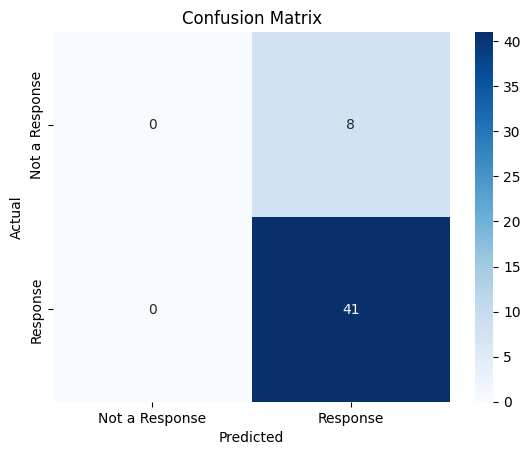

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not a Response', 'Response'], yticklabels=['Not a Response', 'Response'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Step Sizes and Learning curves on built-in predictor 

C:\Users\Sameer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

Step Size (C=0.001): Accuracy = 0.8367
Step Size (C=0.01): Accuracy = 0.8367
Step Size (C=0.1): Accuracy = 0.8367
Step Size (C=1): Accuracy = 0.8571
Step Size (C=10): Accuracy = 0.8776
Step Size (C=100): Accuracy = 0.8776


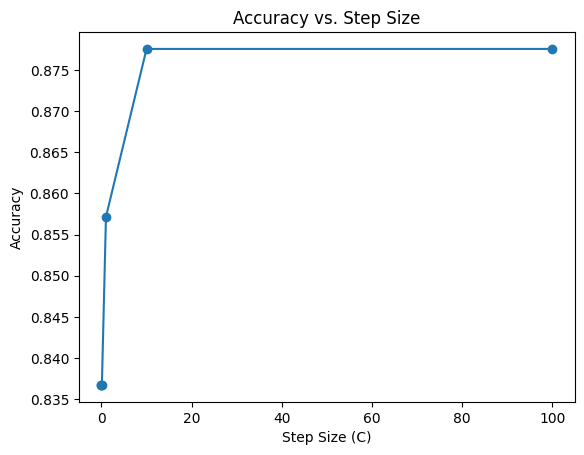

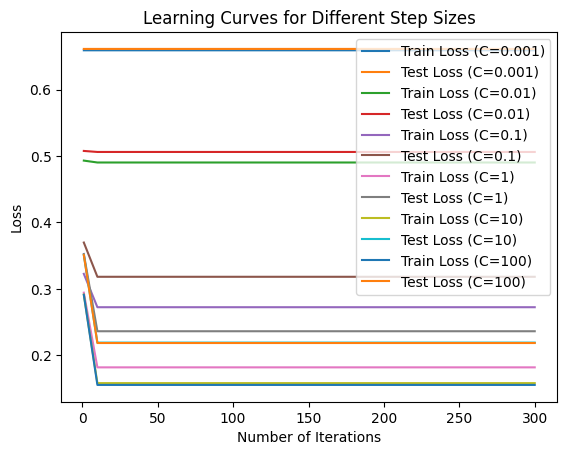

In [18]:
from sklearn.metrics import log_loss

step_sizes = [0.001, 0.01, 0.1, 1, 10, 100]
accuracies = []

train_loss = []
test_loss = []

for step_size in step_sizes:
    model = LogisticRegression(C=step_size,solver='liblinear', max_iter=10000)

    # Train the model with different numbers of iterations and capture loss
    num_iterations = [1, 10, 20, 50, 100, 200, 300]
    iteration_train_loss = []
    iteration_test_loss = []

    for n in num_iterations:
        model.max_iter = n
        model.fit(X_train, y_train)
        # Predict probabilities on the training and test data
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]

        train_log_loss = log_loss(y_train, y_train_proba)
        test_log_loss = log_loss(y_test, y_test_proba)

        iteration_train_loss.append(train_log_loss)
        iteration_test_loss.append(test_log_loss)

    # Store accuracy of the step size
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Step Size (C={step_size}): Accuracy = {accuracy:.4f}")

    train_loss.append(iteration_train_loss)
    test_loss.append(iteration_test_loss)

# Accuracy Score vs Step size plot
plt.figure()
plt.plot(step_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel("Step Size (C)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Step Size")

# Learning curves vs stepsize plot
plt.figure()
for i, step_size in enumerate(step_sizes):
    plt.plot(num_iterations, train_loss[i], label=f"Train Loss (C={step_size})")
    plt.plot(num_iterations, test_loss[i], label=f"Test Loss (C={step_size})")

plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Learning Curves for Different Step Sizes")

plt.show()


# Step Sizes and Learning curves on Custom predictor 

Step Size (C=0.001): Accuracy = 0.8367
Step Size (C=0.01): Accuracy = 0.8367
Step Size (C=0.1): Accuracy = 0.8571
Step Size (C=1): Accuracy = 0.8776
Step Size (C=10): Accuracy = 0.8776
Step Size (C=100): Accuracy = 0.8980


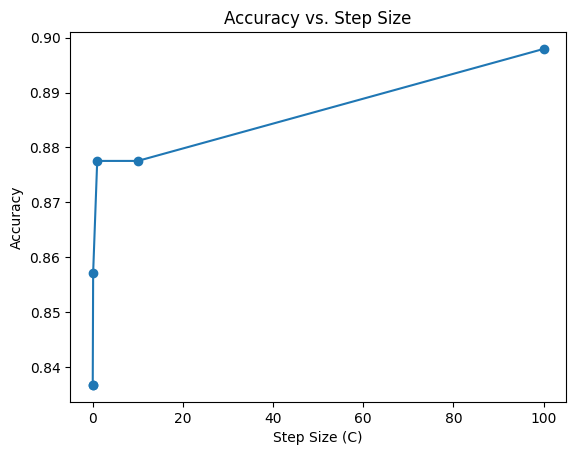

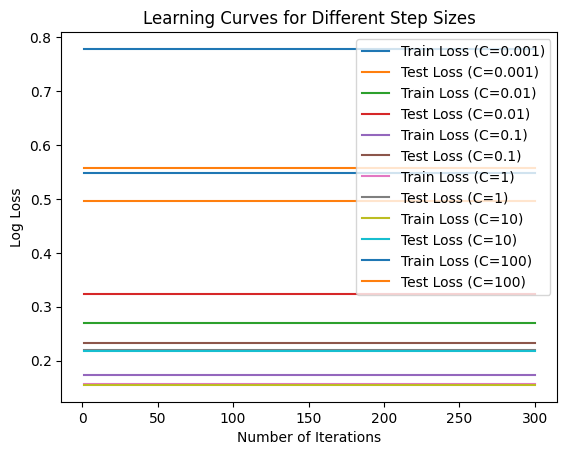

In [19]:

step_sizes = [0.001, 0.01, 0.1, 1, 10, 100]

accuracies = []

train_loss = []
test_loss = []
for step_size in step_sizes:
    model = CustomPredictor(learning_rate=step_size, num_iterations=1000)

    # Train the model with different numbers of iterations and capture loss
    num_iterations = [1, 10, 20, 50, 100, 200, 300]
    iteration_train_loss = []
    iteration_test_loss = []

    for n in num_iterations:
        model.max_iter = n
        model.fit(X_train, y_train)
        # Predict probabilities on the training and test data
        y_train_proba = model.predict_proba(X_train)
        y_test_proba = model.predict_proba(X_test)

        train_log_loss = log_loss(y_train, y_train_proba)
        test_log_loss = log_loss(y_test, y_test_proba)

        iteration_train_loss.append(train_log_loss)
        iteration_test_loss.append(test_log_loss)

    # Store accuracy for this step size
    y_pred = model.predict(X_test)
   
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Step Size (C={step_size}): Accuracy = {accuracy:.4f}")

    train_loss.append(iteration_train_loss)
    test_loss.append(iteration_test_loss)

# Accuracy Score vs Step size plot
plt.figure()
plt.plot(step_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel("Step Size (C)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Step Size")

# Learning curves vs stepsize plot
plt.figure()
for i, step_size in enumerate(step_sizes):
    plt.plot(num_iterations, train_loss[i], label=f"Train Loss (C={step_size})")
    plt.plot(num_iterations, test_loss[i], label=f"Test Loss (C={step_size})")

plt.xlabel("Number of Iterations")
plt.ylabel("Log Loss")
plt.legend()
plt.title("Learning Curves for Different Step Sizes")

plt.show()
